<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,62.322330,98.773030,80.463772,37.470575,5.661756,294.691463,287.313795,7.377668
1,0.0,1.0,54.359535,72.715689,26.550441,54.079073,12.843482,230.548221,217.067668,13.480552
2,0.0,2.0,99.341430,82.026973,20.905487,63.305849,-21.408697,254.171042,277.017327,-22.846284
3,0.0,3.0,83.042859,78.941006,46.078735,85.083248,9.913734,313.059582,303.178798,9.880784
4,0.0,4.0,36.942809,44.163179,60.706106,89.796576,-4.196081,237.412590,239.797747,-2.385157
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.570389,27.164242,42.329136,84.113876,-4.322456,235.855188,241.374405,-5.519218
249996,999.0,246.0,45.154378,55.923471,43.282997,52.564320,-7.046332,199.878833,206.252544,-6.373710
249997,999.0,247.0,75.976610,60.927430,99.896832,67.628388,-7.349719,307.079542,315.332285,-8.252743
249998,999.0,248.0,37.257233,59.621953,90.274463,50.140816,-9.002277,238.292188,247.124229,-8.832041


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    62.322330  98.773030  80.463772  37.470575   5.661756   
      1.0    54.359535  72.715689  26.550441  54.079073  12.843482   
      2.0    99.341430  82.026973  20.905487  63.305849 -21.408697   
      3.0    83.042859  78.941006  46.078735  85.083248   9.913734   
      4.0    36.942809  44.163179  60.706106  89.796576  -4.196081   
...                ...        ...        ...        ...        ...   
999.0 245.0  76.570389  27.164242  42.329136  84.113876  -4.322456   
      246.0  45.154378  55.923471  43.282997  52.564320  -7.046332   
      247.0  75.976610  60.927430  99.896832  67.628388  -7.349719   
      248.0  37.257233  59.621953  90.274463  50.140816  -9.002277   
      249.0  97.317567  47.334098  46.344292  85.100951   1.483504   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    294.691463  287.313795   7.377668  
      1.0    230.548221  217.067668  13.480552  
      2.0    254.171042  277.017327 -22.846284  
      3.0    313.059582  303.178798   9.880784  
      4.0    237.412590  239.797747  -2.385157  
...                 ...         ...        ...  
999.0 245.0  235.855188  241.374405  -5.519218  
      246.0  199.878833  206.252544  -6.373710  
      247.0  307.079542  315.332285  -8.252743  
      248.0  238.292188  247.124229  -8.832041  
      249.0  287.580411  287.207910   0.372502  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    62.322330  98.773030  80.463772  37.470575   5.661756   
      1.0    54.359535  72.715689  26.550441  54.079073  12.843482   
      2.0    99.341430  82.026973  20.905487  63.305849 -21.408697   
      3.0    83.042859  78.941006  46.078735  85.083248   9.913734   
      4.0    36.942809  44.163179  60.706106  89.796576  -4.196081   
...                ...        ...        ...        ...        ...   
999.0 245.0  76.570389  27.164242  42.329136  84.113876  -4.322456   
      246.0  45.154378  55.923471  43.282997  52.564320  -7.046332   
      247.0  75.976610  60.927430  99.896832  67.628388  -7.349719   
      248.0  37.257233  59.621953  90.274463  50.140816  -9.002277   
      249.0  97.317567  47.334098  46.344292  85.100951   1.483504   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    294.691463  287.313795   7.377668  
      1.0    230.548221  217.067668  13.480552  
      2.0    254.171042  277.017327 -22.846284  
      3.0    313.059582  303.178798   9.880784  
      4.0    237.412590  239.797747  -2.385157  
...                 ...         ...        ...  
999.0 245.0  235.855188  241.374405  -5.519218  
      246.0  199.878833  206.252544  -6.373710  
      247.0  307.079542  315.332285  -8.252743  
      248.0  238.292188  247.124229  -8.832041  
      249.0  287.580411  287.207910   0.372502  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,62.322330,98.773030,80.463772,37.470575,5.661756,294.691463,287.313795,7.377668
1,0.0,1.0,54.359535,72.715689,26.550441,54.079073,12.843482,230.548221,217.067668,13.480552
2,0.0,2.0,99.341430,82.026973,20.905487,63.305849,-21.408697,254.171042,277.017327,-22.846284
3,0.0,3.0,83.042859,78.941006,46.078735,85.083248,9.913734,313.059582,303.178798,9.880784
4,0.0,4.0,36.942809,44.163179,60.706106,89.796576,-4.196081,237.412590,239.797747,-2.385157
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.570389,27.164242,42.329136,84.113876,-4.322456,235.855188,241.374405,-5.519218
249996,999.0,246.0,45.154378,55.923471,43.282997,52.564320,-7.046332,199.878833,206.252544,-6.373710
249997,999.0,247.0,75.976610,60.927430,99.896832,67.628388,-7.349719,307.079542,315.332285,-8.252743
249998,999.0,248.0,37.257233,59.621953,90.274463,50.140816,-9.002277,238.292188,247.124229,-8.832041


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    62.322330  98.773030  80.463772  37.470575   5.661756   
      1.0    54.359535  72.715689  26.550441  54.079073  12.843482   
      2.0    99.341430  82.026973  20.905487  63.305849 -21.408697   
      3.0    83.042859  78.941006  46.078735  85.083248   9.913734   
      4.0    36.942809  44.163179  60.706106  89.796576  -4.196081   
...                ...        ...        ...        ...        ...   
999.0 245.0  76.570389  27.164242  42.329136  84.113876  -4.322456   
      246.0  45.154378  55.923471  43.282997  52.564320  -7.046332   
      247.0  75.976610  60.927430  99.896832  67.628388  -7.349719   
      248.0  37.257233  59.621953  90.274463  50.140816  -9.002277   
      249.0  97.317567  47.334098  46.344292  85.100951   1.483504   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    294.691463  287.313795   7.377668  
      1.0    230.548221  217.067668  13.480552  
      2.0    254.171042  277.017327 -22.846284  
      3.0    313.059582  303.178798   9.880784  
      4.0    237.412590  239.797747  -2.385157  
...                 ...         ...        ...  
999.0 245.0  235.855188  241.374405  -5.519218  
      246.0  199.878833  206.252544  -6.373710  
      247.0  307.079542  315.332285  -8.252743  
      248.0  238.292188  247.124229  -8.832041  
      249.0  287.580411  287.207910   0.372502  

[250000 rows x 8 columns]

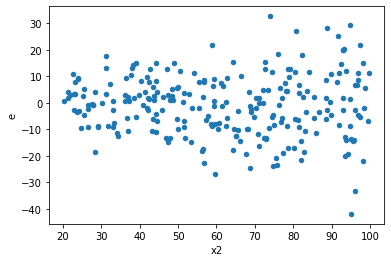

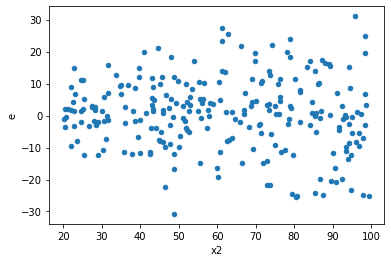

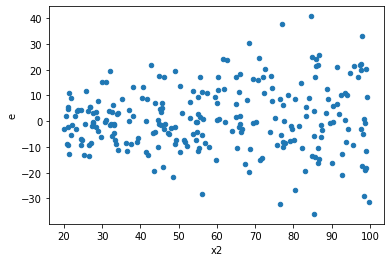

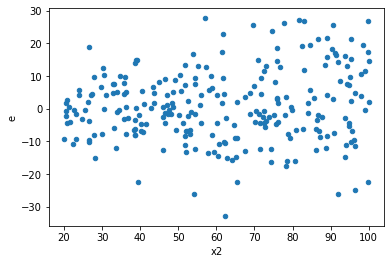

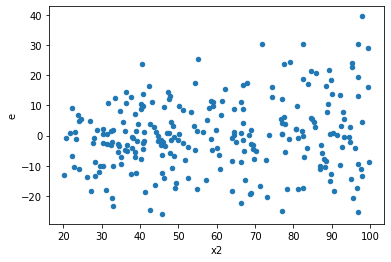

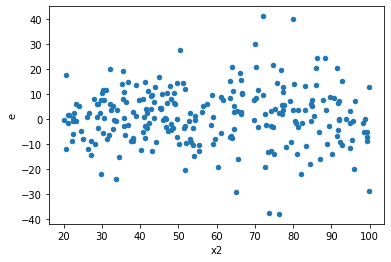

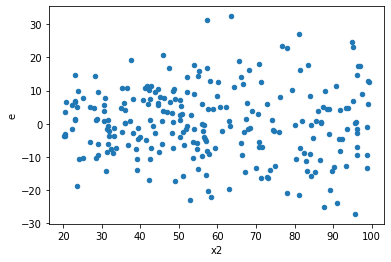

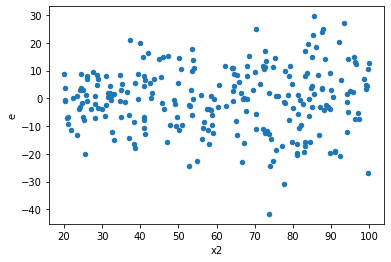

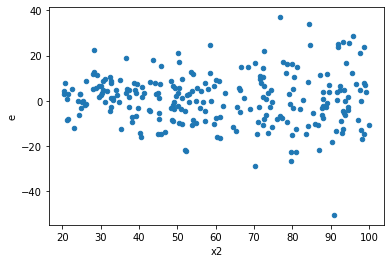

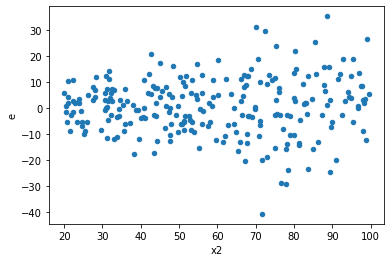

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,118.0,128.0,67083.78168996412,76984.60610531972,568.5066244912214,601.4422351978103,1.057933556598508,0.753558703355826,0.623220648322087,0.376779351677913,Reject001=1 : Homoscedasticity
2.0,112.0,134.0,77489.4130027559,100707.37793943047,691.8697589531777,751.547596562914,1.0862558839109127,0.6441313477306032,0.6779343261346984,0.3220656738653016,Reject001=1 : Homoscedasticity
9.0,119.0,127.0,80771.78464371226,113317.19882379785,678.7544928043047,892.2614080614004,1.3145569090452458,0.12987468474570463,0.9350626576271477,0.06493734237285231,Reject001=1 : Homoscedasticity
13.0,114.0,132.0,79773.58820253445,99671.04297306512,699.7683175660917,755.0836588868569,1.0790480791030395,0.6710937684096283,0.6644531157951858,0.33554688420481416,Reject001=1 : Homoscedasticity
14.0,117.0,129.0,77641.17204716164,88246.36165155044,663.5997610868517,684.0803228802359,1.0308628227349583,0.8642320265199515,0.5678839867400243,0.43211601325997573,Reject001=1 : Homoscedasticity
15.0,126.0,120.0,79572.9446757674,91695.60323240352,631.5313069505349,764.130026936696,1.2099638110206101,0.2931028773183586,0.8534485613408207,0.1465514386591793,Reject001=1 : Homoscedasticity
17.0,116.0,130.0,65751.52928955373,114614.44754819026,566.8235283582218,881.6495965245405,1.5554216655017794,0.014507996589767203,0.9927460017051164,0.007253998294883601,Reject001=1 : Homoscedasticity
20.0,125.0,121.0,80177.54320110247,86977.0320761431,641.4203456088197,718.8184469102736,1.1206667387951181,0.5293300494828179,0.735334975258591,0.26466502474140896,Reject001=1 : Homoscedasticity
24.0,145.0,101.0,83539.35523747298,80032.0608300889,576.1334843963654,792.3966418820684,1.3753698810134065,0.08825854951781631,0.9558707252410918,0.044129274758908155,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,127.0,78160.29196294541,81148.05179089658,656.8091761592051,638.9610377235952,0.9728259910435787,0.8804505639347552,Reject001=1 : Homoscedasticity
1.0,118.0,128.0,67083.78168996412,76984.60610531972,568.5066244912214,601.4422351978103,1.057933556598508,0.753558703355826,Reject001=1 : Homoscedasticity
2.0,112.0,134.0,77489.4130027559,100707.37793943047,691.8697589531777,751.547596562914,1.0862558839109127,0.6441313477306032,Reject001=1 : Homoscedasticity
3.0,123.0,123.0,73412.83255362687,73304.8073812496,596.8522971839583,595.9740437499968,0.9985285246649711,0.9934979874678398,Reject001=1 : Homoscedasticity
4.0,139.0,107.0,94067.83451847766,69580.24712139987,676.7470109242997,650.2826833775688,0.9608947995047868,0.8204605845034408,Reject001=1 : Homoscedasticity
5.0,116.0,130.0,76449.10213316992,81972.53857099127,659.0439839066372,630.5579890076251,0.9567767924529791,0.8098796466871372,Reject001=1 : Homoscedasticity
6.0,110.0,136.0,73320.12425878439,70632.24337601304,666.5465841707671,519.3547307059782,0.7791724435165978,0.17414960711003952,Reject001=1 : Homoscedasticity
7.0,139.0,107.0,105734.1848753104,68598.03434507009,760.67758903101,641.1031247202812,0.8428053277301769,0.34252727895745433,Reject001=1 : Homoscedasticity
8.0,107.0,139.0,79022.85063854563,78657.5489270547,738.5313143789311,565.881646957228,0.7662256642876503,0.1491032752829729,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      985
Reject001=0 : Heteroscedasticity     15
Name: Result_test, dtype: int64